In [1]:
import sys
import pathlib
import pandas as pd
import numpy as np
import boto3
import time

ROOT = pathlib.Path().absolute().parent.as_posix()
if ROOT not in sys.path:
    sys.path.append(ROOT)
    
from helpers import *

In [2]:
df = fill_penultimate_df()

df.to_csv(ROOT_FOLDER_PATH + '/final_df.csv', index = True)
upload_df_to_s3(bucket = 'asdi-hackathon', df = df, key = 'final-data/final_df.csv')

popd_weight =  1.3304790199790024
apply_greenspace_score_function complete
Time taken: 3.36
Successful upload


In [3]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Airport', 'Water', 'Building', 'Green_Space',
       'Railway_Station', 'Urban_Area', 'Distance_Nearest_Greenspace',
       'Value_co', 'Value_no2', 'Value_o3', 'Value_so2', 'Value_ai',
       'AQ_score', 'Pop_density', 'Greenspace_score', 'penalty_reward'],
      dtype='object')


In [4]:
df

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Distance_Nearest_Greenspace,Value_co,Value_no2,Value_o3,Value_so2,Value_ai,AQ_score,Pop_density,Greenspace_score,penalty_reward
0,51.737184,-0.620643,0,0,0,1,0,0,0.000000,0.764264,0.004088,7.248996,0.032141,-1.031149,0.360777,1.445061,0.360716,0.500
1,51.737184,-0.617012,0,0,0,0,0,0,0.250000,0.764304,0.004140,7.250456,0.032148,-1.035486,0.361721,1.445061,0.992834,1.375
2,51.737184,-0.613382,0,0,1,1,0,0,0.000000,0.764350,0.004143,7.250998,0.032186,-1.037714,0.361822,1.445061,0.180532,0.250
3,51.737183,-0.609751,0,0,1,1,0,0,0.000000,0.764624,0.004142,7.251659,0.032087,-1.035978,0.362065,3.517970,0.352945,0.250
4,51.737183,-0.606120,0,0,0,1,0,0,0.000000,0.764288,0.004142,7.252279,0.031958,-1.039697,0.361140,3.517970,0.705582,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58243,51.238843,0.312049,0,0,0,1,0,0,0.000000,0.764161,0.002717,7.310894,0.028964,-0.748909,0.355456,0.916133,0.270974,0.500
58244,51.238815,0.315640,0,0,0,1,0,0,0.000000,0.764524,0.002728,7.310550,0.029058,-0.745427,0.356564,0.916133,0.271344,0.500
58245,51.238786,0.319231,0,1,1,1,0,0,0.000000,0.764969,0.002732,7.310113,0.029139,-0.744029,0.357403,0.916133,0.000000,0.000
58246,51.238757,0.322822,0,1,1,0,0,0,0.249987,0.765131,0.002735,7.311109,0.029128,-0.740657,0.358034,0.916133,0.000000,0.000


In [5]:
df['Greenspace_score'].describe()

count    58248.000000
mean         0.754272
std          1.886184
min          0.000000
25%          0.096061
50%          0.356190
75%          0.824011
max        109.912634
Name: Greenspace_score, dtype: float64

In [6]:
df['AQ_score'].describe()

count    58248.000000
mean         0.381069
std          0.032828
min          0.221994
25%          0.356565
50%          0.374261
75%          0.403724
max          0.652611
Name: AQ_score, dtype: float64

In [8]:
df['penalty_reward'].describe()

count    58248.000000
mean         0.375516
std          0.348171
min          0.000000
25%          0.250000
50%          0.312500
75%          0.500000
max          3.072464
Name: penalty_reward, dtype: float64

In [13]:
df['Distance_Nearest_Greenspace'].describe()

count    58248.000000
mean         0.058826
std          0.122083
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.334489
Name: Distance_Nearest_Greenspace, dtype: float64

In [9]:
df2 = df.sort_values('Greenspace_score', ascending = False)
df2 = df2.drop(['Value_co', 'Value_no2', 'Value_o3', 'Value_so2', 'Value_ai'], axis = 1)
df2

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Distance_Nearest_Greenspace,AQ_score,Pop_density,Greenspace_score,penalty_reward
25867,51.516024,-0.177874,0,0,1,0,0,1,0.358143,0.434358,353.029144,109.912634,0.933723
29291,51.486798,-0.184159,0,0,1,0,0,1,0.250000,0.425906,358.050598,102.591251,0.859375
24811,51.525071,-0.192616,0,0,1,0,0,1,0.250000,0.442231,323.212494,92.642315,0.859375
26130,51.513776,-0.177801,0,0,1,0,0,1,0.250000,0.433797,299.359161,85.819122,0.859375
24610,51.526293,0.031359,0,0,1,0,0,1,0.250000,0.443280,286.254272,82.078593,0.859375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,51.566720,0.037480,0,1,0,1,0,0,0.000000,0.414312,8.803872,0.000000,0.000000
35559,51.433502,-0.427657,0,1,1,1,0,1,0.000000,0.389620,1.056274,0.000000,0.000000
35558,51.433508,-0.431263,0,1,0,1,0,1,0.000000,0.393137,1.056274,0.000000,0.000000
35557,51.433514,-0.434870,0,1,0,1,0,1,0.000000,0.395171,1.056274,0.000000,0.000000


In [10]:
len(df2)

58248

In [11]:
df2[df2['Greenspace_score'] > 100]

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Distance_Nearest_Greenspace,AQ_score,Pop_density,Greenspace_score,penalty_reward
25867,51.516024,-0.177874,0,0,1,0,0,1,0.358143,0.434358,353.029144,109.912634,0.933723
29291,51.486798,-0.184159,0,0,1,0,0,1,0.250000,0.425906,358.050598,102.591251,0.859375


<AxesSubplot:>

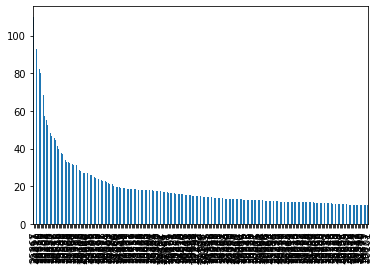

In [12]:
df2[df2['Greenspace_score'] > 10]['Greenspace_score'].plot(kind = 'bar')